In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [4]:
# Load the data with the correct encoding
data = pd.read_csv(r'C:\Users\USER\Desktop\MTPE\Analitica_MTPE\Dataset\Dataset.csv', sep=';', encoding='latin1')
data.head()

,FECHA_CORTE,PERIODO_REGISTRO,FECHA_ACCIDENTE,TIPO_ACCIDENTE,SUB_GRUPO_TIPO_ACCIDENTE,AGENTE_CAUSANTE,SUB_GRUPO_AGENTE_CAUSANTE_1,PARTE_AFECTADA,NATURALEZA_LESION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,ACTIVIDAD_ECONOMICA,SEGURO_SALUD,COBERTURA_PENSION,SEXO_TRABAJADOR,ESTADO_CIVIL,CATEGORIA_OCUPACIONAL,TIPO_CONTRATO,GRADI_INSTRUCCION,AREA_TRABAJO,EDAD,TURNO_TRABAJO,GRAVEDAD_ACCIDENTE,DIAS_DESCANZO,MONTO_DESCANSO
0,20241016,202401,04-01-2024,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NaN,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NaN,"OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...",CUERPO EXTRAÑO EN OJOS,CALLAO,CALLAO,CALLAO,240101,INDUSTRIAS MANUFACTURERAS,ESSALUD,OTRO,MASCULINO,SOLTERO/A,EMPLEADO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,OPERACIONES,38,DÍA (D),ACCIDENTE LEVE,1,150.55
1,20241016,202401,11-01-2024,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NaN,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NaN,DEDOS DE LA MANO,TRAUMATISMOS INTERNOS,CALLAO,CALLAO,CALLAO,240101,INDUSTRIAS MANUFACTURERAS,ESSALUD,OTRO,MASCULINO,SOLTERO/A,EMPLEADO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,OPERACIONES,25,DÍA (D),ACCIDENTE LEVE,3,101.23
2,20241016,202401,04-01-2024,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NaN,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NaN,OTROS (ESPECIFICAR),OTROS,CALLAO,CALLAO,CALLAO,240101,INDUSTRIAS MANUFACTURERAS,ESSALUD,OTRO,MASCULINO,NaN,EMPLEADO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,OPERACIONES,36,DÍA (D),ACCIDENTE LEVE,2,262.77
3,20241016,202401,09-01-2024,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NaN,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NaN,OTROS (ESPECIFICAR),CONTUSIONES,CALLAO,CALLAO,CALLAO,240101,"TRANSPORTES, ALMACENAM. Y COMUN.",ESSALUD,OTRO,FEMENINO,SOLTERO/A,EMPLEADO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,OPERACIONES,46,DÍA (D),ACCIDENTE LEVE,4,647.87
4,20241016,202401,14-01-2024,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NaN,OTROS APARATOS,OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍG...,CARA (UBICACIÓN NO CLASIFICADA EN OTRAS DENOMI...,TRAUMATISMOS INTERNOS,LIMA METROPOLITANA,LIMA,LIMA,140101,INDUSTRIAS MANUFACTURERAS,ESSALUD,PACÍFICO VIDA,MASCULINO,SOLTERO/A,EMPLEADO,INDETERMINADO,EDUCACIÓN SECUNDARIA COMPLETA,AREA DE FUNDICION,49,DÍA (D),ACCIDENTE LEVE,3,309.97


In [5]:
print(list(data.columns))
data.isnull().sum()

['FECHA_CORTE', 'PERIODO_REGISTRO', 'FECHA_ACCIDENTE', 'TIPO_ACCIDENTE', 'SUB_GRUPO_TIPO_ACCIDENTE', 'AGENTE_CAUSANTE', 'SUB_GRUPO_AGENTE_CAUSANTE_1', 'PARTE_AFECTADA', 'NATURALEZA_LESION', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'ACTIVIDAD_ECONOMICA', 'SEGURO_SALUD', 'COBERTURA_PENSION', 'SEXO_TRABAJADOR', 'ESTADO_CIVIL', 'CATEGORIA_OCUPACIONAL', 'TIPO_CONTRATO', 'GRADI_INSTRUCCION', 'AREA_TRABAJO', 'EDAD', 'TURNO_TRABAJO', 'GRAVEDAD_ACCIDENTE', 'DIAS_DESCANZO', 'MONTO_DESCANSO']


FECHA_CORTE                       0
PERIODO_REGISTRO                  0
FECHA_ACCIDENTE                   0
TIPO_ACCIDENTE                    0
SUB_GRUPO_TIPO_ACCIDENTE       6882
AGENTE_CAUSANTE                   0
SUB_GRUPO_AGENTE_CAUSANTE_1    7218
PARTE_AFECTADA                    0
NATURALEZA_LESION                 0
DEPARTAMENTO                      0
PROVINCIA                         0
DISTRITO                          0
UBIGEO                            0
ACTIVIDAD_ECONOMICA              31
SEGURO_SALUD                      0
COBERTURA_PENSION               261
SEXO_TRABAJADOR                   3
ESTADO_CIVIL                   2623
CATEGORIA_OCUPACIONAL             0
TIPO_CONTRATO                     0
GRADI_INSTRUCCION                 0
AREA_TRABAJO                      0
EDAD                              0
TURNO_TRABAJO                     0
GRAVEDAD_ACCIDENTE                0
DIAS_DESCANZO                     0
MONTO_DESCANSO                    0
dtype: int64

In [6]:
# datos únicos por columna de tipo object
for i in data.columns:
    if data[i].dtype == 'object':
        print(f"{i}: {data[i].nunique()}")


FECHA_ACCIDENTE: 182
TIPO_ACCIDENTE: 10
SUB_GRUPO_TIPO_ACCIDENTE: 26
AGENTE_CAUSANTE: 7
SUB_GRUPO_AGENTE_CAUSANTE_1: 31
PARTE_AFECTADA: 41
NATURALEZA_LESION: 22
DEPARTAMENTO: 25
PROVINCIA: 53
DISTRITO: 165
UBIGEO: 165
ACTIVIDAD_ECONOMICA: 16
SEGURO_SALUD: 4
COBERTURA_PENSION: 6
SEXO_TRABAJADOR: 2
ESTADO_CIVIL: 5
CATEGORIA_OCUPACIONAL: 10
TIPO_CONTRATO: 4
GRADI_INSTRUCCION: 17
AREA_TRABAJO: 2240
TURNO_TRABAJO: 3
GRAVEDAD_ACCIDENTE: 2


In [7]:
# Contar cuantos registros hay de tipo de accidente OTROS No especificado
data[data['TIPO_ACCIDENTE']=='OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR FALTA DE DATOS SUFICIENTES'].shape[0]
#Reemplazar los valores de la columna SUB_TIPO_ACCIDENTE que son OTROS No especificado por OTROS
for i in range(len(data)):
    if data['TIPO_ACCIDENTE'][i]=='OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR FALTA DE DATOS SUFICIENTES':
        data['SUB_GRUPO_TIPO_ACCIDENTE'][i]='OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR FALTA DE DATOS SUFICIENTES'

In [8]:
# Filtrar solo los nombres de los valores de la columna SUB_TIPO_ACCIDENTE que son NAN
data[data['SUB_GRUPO_TIPO_ACCIDENTE'].isnull()]['TIPO_ACCIDENTE'].unique()
#Reemplazar los valores de la columna SUB_TIPO_ACCIDENTE que son NAN por solo el valor de la columna TIPO_ACCIDENTE
for i in range(len(data)):
    if pd.isnull(data['SUB_GRUPO_TIPO_ACCIDENTE'][i]):
        data['SUB_GRUPO_TIPO_ACCIDENTE'][i]=data['TIPO_ACCIDENTE'][i]
data.isnull().sum()

FECHA_CORTE                       0
PERIODO_REGISTRO                  0
FECHA_ACCIDENTE                   0
TIPO_ACCIDENTE                    0
SUB_GRUPO_TIPO_ACCIDENTE          0
AGENTE_CAUSANTE                   0
SUB_GRUPO_AGENTE_CAUSANTE_1    7218
PARTE_AFECTADA                    0
NATURALEZA_LESION                 0
DEPARTAMENTO                      0
PROVINCIA                         0
DISTRITO                          0
UBIGEO                            0
ACTIVIDAD_ECONOMICA              31
SEGURO_SALUD                      0
COBERTURA_PENSION               261
SEXO_TRABAJADOR                   3
ESTADO_CIVIL                   2623
CATEGORIA_OCUPACIONAL             0
TIPO_CONTRATO                     0
GRADI_INSTRUCCION                 0
AREA_TRABAJO                      0
EDAD                              0
TURNO_TRABAJO                     0
GRAVEDAD_ACCIDENTE                0
DIAS_DESCANZO                     0
MONTO_DESCANSO                    0
dtype: int64

In [9]:
# Filtrar solo los nombres de los valores de la columna SUB_GRUPO_AGENTE_CAUSANTE_1 que son NAN
data[data['SUB_GRUPO_AGENTE_CAUSANTE_1'].isnull()]['AGENTE_CAUSANTE'].unique()
#Reemplazar los valores de la columna SUB_GRUPO_AGENTE_CAUSANTE_1 que son NAN por solo el valor de la columna AGENTE_CAUSANTE
for i in range(len(data)):
    if pd.isnull(data['SUB_GRUPO_AGENTE_CAUSANTE_1'][i]):
        data['SUB_GRUPO_AGENTE_CAUSANTE_1'][i]=data['AGENTE_CAUSANTE'][i]

In [10]:
# Filtrar las filas donde la ACTIVIDAD_ECONOMICA es NAN
data[data['ACTIVIDAD_ECONOMICA'].isnull()].head()

,FECHA_CORTE,PERIODO_REGISTRO,FECHA_ACCIDENTE,TIPO_ACCIDENTE,SUB_GRUPO_TIPO_ACCIDENTE,AGENTE_CAUSANTE,SUB_GRUPO_AGENTE_CAUSANTE_1,PARTE_AFECTADA,NATURALEZA_LESION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,ACTIVIDAD_ECONOMICA,SEGURO_SALUD,COBERTURA_PENSION,SEXO_TRABAJADOR,ESTADO_CIVIL,CATEGORIA_OCUPACIONAL,TIPO_CONTRATO,GRADI_INSTRUCCION,AREA_TRABAJO,EDAD,TURNO_TRABAJO,GRAVEDAD_ACCIDENTE,DIAS_DESCANZO,MONTO_DESCANSO
1814,20241016,202401,08-01-2024,ATRAPADA POR UN OBJETO O ENTRE OBJETOS,ATRAPADA POR UN OBJETO,MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN,OTROS MEDIOS DE TRANSPORTE,DEDOS DE LA MANO,OTROS,LIMA METROPOLITANA,LIMA,LIMA,140101,NaN,ESSALUD,OTRO,MASCULINO,SOLTERO/A,OTROS,PLAZO FIJO,EDUCACIÓN ESPECIAL COMPLETA,ALMACEN,33,NOCHE (N),ACCIDENTE INCAPACITANTE,0,0.00
1829,20241016,202401,19-01-2024,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,"OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...",CUERPO EXTRAÑO EN OJOS,LIMA METROPOLITANA,LIMA,VILLA MARIA DEL TRIUNFO,140132,NaN,ESSALUD,OTRO,FEMENINO,NaN,OPERARIO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,ACABADOS,24,DÍA (D),ACCIDENTE LEVE,3,99.19
1845,20241016,202401,10-01-2024,"EXPOSICIÓN A, O CONTACTO CON, SUSTANCIAS NOCIV...","CONTACTO POR INHALACIÓN, POR INGESTIÓN O POR A...","MATERIALES, SUSTANCIAS Y RADIACIONES",OTROS MATERIALES Y SUSTANCIAS NO CLASIFICADOS ...,OTROS (ESPECIFICAR),OTROS,LIMA METROPOLITANA,LIMA,PUEBLO LIBRE,020707,NaN,ESSALUD,OTRO,MASCULINO,CASADO/A,PEÓN,PLAZO FIJO,EDUCACIÓN PRIMARIA COMPLETA,CONSTRUCCION,56,DÍA (D),ACCIDENTE LEVE,3,265.74
1861,20241016,202401,08-01-2024,"PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OB...",CHOQUE CONTRA OBJETOS MÓVILES,MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN,APARATOS DE IZAR,PIE (CON EXCEPCIÓN DE LOS DEDOS),CONTUSIONES,LIMA METROPOLITANA,LIMA,LURIGANCHO,140112,NaN,EPS,OTRO,MASCULINO,SOLTERO/A,OPERARIO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,OPERACIONES,39,NOCHE (N),ACCIDENTE LEVE,7,360.16
1888,20241016,202401,02-01-2024,PUNZO CORTANTES,PUNZO CORTANTES,"MATERIALES, SUSTANCIAS Y RADIACIONES",OTROS MATERIALES Y SUSTANCIAS NO CLASIFICADOS ...,"UBICACIONES MÚLTIPLES, COMPROMISO DE DOS O MAS...",FRACTURAS,LIMA METROPOLITANA,LIMA,SURQUILLO,140131,NaN,ESSALUD,MAPFRE PERÚ VIDA,MASCULINO,SOLTERO/A,EMPLEADO,PLAZO FIJO,"EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) C...",OBRA,46,DÍA (D),ACCIDENTE LEVE,0,0.00


In [11]:
from langchain import LLMChain, PromptTemplate
from langchain.llms import HuggingFaceHub
from dotenv import load_dotenv
import os
import pandas as pd
from collections import defaultdict
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class EconomicActivityPredictor:
    def __init__(self):
        """Initialize the predictor using area-based grouping approach"""
        load_dotenv()
        self.api_token = self._get_api_token()
        
        # Diccionario para almacenar las relaciones área -> actividades económicas
        self.area_activities_map = defaultdict(set)
        # Contadores para cada área -> actividad económica
        self.area_activity_counts = defaultdict(lambda: defaultdict(int))
        
        self._initialize_llm()
    
    def _get_api_token(self) -> str:
        api_token = os.getenv("HUGGINGFACEHUB_API_TOKEN")
        if not api_token:
            raise ValueError("HUGGINGFACEHUB_API_TOKEN environment variable not set")
        return api_token

    def _initialize_llm(self) -> None:
        """Initialize the language model with a simplified prompt focused on work areas"""
        try:
            self.llm = HuggingFaceHub(
                repo_id="mistralai/Mistral-7B-Instruct-v0.3",
                model_kwargs={
                    "trust_remote_code": True,
                    "temperature": 0.1,
                    "max_length": 1000
                },
                huggingfacehub_api_token=self.api_token
            )
            
            self.prompt_template = """
Dada un área de trabajo y las posibles actividades económicas asociadas a ella, 
selecciona la actividad económica más apropiada.

Área de trabajo: {area_trabajo}

Actividades económicas posibles para esta área:
{possible_activities}

Considerando el contexto del área de trabajo, ¿cuál de estas actividades económicas es la más apropiada?
Responde SOLAMENTE con el nombre exacto de una de las actividades listadas.
"""
            
        except Exception as e:
            logger.error(f"Error initializing LLM: {str(e)}")
            raise

    def _build_area_activity_mappings(self, data: pd.DataFrame) -> None:
        """Build mappings between work areas and economic activities from known data"""
        # Filtrar solo registros con valores conocidos
        known_data = data[~data['ACTIVIDAD_ECONOMICA'].isnull()]
        
        for _, row in known_data.iterrows():
            area = row['AREA_TRABAJO']
            activity = row['ACTIVIDAD_ECONOMICA']
            
            self.area_activities_map[area].add(activity)
            self.area_activity_counts[area][activity] += 1
        
        logger.info(f"Built mappings for {len(self.area_activities_map)} unique work areas")

    def _get_most_likely_activities(self, area: str, top_n: int = 5) -> list:
        """Get the most common economic activities for a given work area"""
        if area not in self.area_activities_map:
            return list(set(activity for activities in self.area_activities_map.values() for activity in activities))
        
        # Ordenar actividades por frecuencia
        activities = self.area_activity_counts[area]
        sorted_activities = sorted(activities.items(), key=lambda x: x[1], reverse=True)
        
        return [activity for activity, _ in sorted_activities[:top_n]]

    def predict_activity_economica(self, area_trabajo: str) -> str:
        """Predict economic activity based on work area"""
        try:
            # Obtener las actividades más probables para esta área
            possible_activities = self._get_most_likely_activities(area_trabajo)
            
            if not possible_activities:
                return "ND - NO IDENTIFICADO - CODIGO DE MINTRA"
            
            # Si solo hay una actividad posible, usarla directamente
            if len(possible_activities) == 1:
                return possible_activities[0]
            
            # Crear prompt con las actividades posibles
            prompt = PromptTemplate(
                template=self.prompt_template,
                input_variables=['area_trabajo', 'possible_activities']
            )
            
            chain = LLMChain(prompt=prompt, llm=self.llm)
            
            # Ejecutar predicción
            prediction = chain.run({
                'area_trabajo': area_trabajo,
                'possible_activities': "\n".join(f"- {activity}" for activity in possible_activities)
            }).strip()
            
            # Validar que la predicción esté entre las actividades posibles
            if prediction in possible_activities:
                return prediction
            else:
                # Si la predicción no es válida, retornar la actividad más común para esa área
                return possible_activities[0]
            
        except Exception as e:
            logger.error(f"Error in prediction: {str(e)}")
            return "ND - NO IDENTIFICADO - CODIGO DE MINTRA"

    def process_dataset(self, data: pd.DataFrame, batch_size: int = 100) -> pd.DataFrame:
        """Process the complete dataset using the area-based approach"""
        try:
            if not isinstance(data, pd.DataFrame):
                raise ValueError("Input must be a pandas DataFrame")
            
            # Crear copia para no modificar el original
            data_copy = data.copy()
            
            # Construir mapeos de área -> actividades
            self._build_area_activity_mappings(data_copy)
            
            # Identificar registros con actividad económica faltante
            missing_mask = data_copy['ACTIVIDAD_ECONOMICA'].isnull()
            missing_indices = data_copy[missing_mask].index
            
            if len(missing_indices) > 0:
                logger.info(f"Processing {len(missing_indices)} rows with missing values")
                
                # Procesar en batches
                for start_idx in range(0, len(missing_indices), batch_size):
                    end_idx = min(start_idx + batch_size, len(missing_indices))
                    batch_indices = missing_indices[start_idx:end_idx]
                    
                    # Procesar cada registro en el batch
                    for idx in batch_indices:
                        area = data_copy.loc[idx, 'AREA_TRABAJO']
                        prediction = self.predict_activity_economica(area)
                        data_copy.at[idx, 'ACTIVIDAD_ECONOMICA'] = prediction
                    
                    logger.info(f"Processed batch {start_idx//batch_size + 1}")
                    
                    # Mostrar distribución parcial
                    current_distribution = data_copy.loc[missing_indices[:end_idx], 'ACTIVIDAD_ECONOMICA'].value_counts()
                    logger.info(f"Current prediction distribution:\n{current_distribution}")
            
            return data_copy
            
        except Exception as e:
            logger.error(f"Error processing dataset: {str(e)}")
            raise

if __name__ == "__main__":
    try:
        # Inicializar predictor
        predictor = EconomicActivityPredictor()

        # Procesar dataset
        processed_data = predictor.process_dataset(data)
        
        # Analizar distribución final de predicciones
        print("\nDistribución final de actividades económicas:")
        print(processed_data['ACTIVIDAD_ECONOMICA'].value_counts(normalize=True))
        
        # Guardar resultados
        processed_data.to_csv("processed_data_with_predictions.csv", index=False)
        logger.info("Processing completed successfully")
        
    except Exception as e:
        logger.error(f"Application error: {str(e)}")

C:\Users\USER\AppData\Local\Temp\ipykernel_28688\3017425564.py:34: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  self.llm = HuggingFaceHub(
2024-10-27 16:58:10,850 - INFO - Built mappings for 2238 unique work areas
2024-10-27 16:58:10,855 - INFO - Processing 31 rows with missing values
C:\Users\USER\AppData\Local\Temp\ipykernel_28688\3017425564.py:105: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(prompt=prompt, llm=self.llm)
C:\Users\USER\AppData\Local\Temp\ipykernel_28688\3017425564.py:108: LangChainDeprecationWarn


Distribución final de actividades económicas:
ACTIVIDAD_ECONOMICA
INDUSTRIAS MANUFACTURERAS                                                    0.251899
ACT. INMOBILIARIAS, EMP. Y ALQ.                                              0.165818
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES    0.128747
TRANSPORTES, ALMACENAM. Y COMUN.                                             0.122568
HOTELES Y RESTAURANTES                                                       0.086833
CONSTRUCCIÓN                                                                 0.074226
OTRAS ACT.,SERV.COM.,SOC.Y PER.                                              0.041246
SERVICIOS SOCIALES Y DE SALUD                                                0.040494
EXPLOTACIÓN DE MINAS Y CANTERAS                                              0.035652
AGRICULT.,GANAD.,CAZA Y SILVIC.                                              0.017617
PESCA                                                                    

2024-10-27 16:58:18,475 - INFO - Processing completed successfully


In [12]:
#Imputar valores faltantes de la columna Sexo trabajador con el valor más común
processed_data['SEXO_TRABAJADOR'].fillna(processed_data['SEXO_TRABAJADOR'].mode()[0], inplace=True)

In [13]:
# Imputar valores de la columna COBERTURA_PENSION que son NAN con el valor más común
for i in processed_data['COBERTURA_PENSION'].unique():
    if i is np.nan:
        processed_data['COBERTURA_PENSION'].replace(i, processed_data['COBERTURA_PENSION'].mode()[0], inplace=True)

processed_data['COBERTURA_PENSION'].value_counts()

COBERTURA_PENSION
OTRO                                          7760
MAPFRE PERÚ VIDA                              1326
PACÍFICO VIDA                                 1143
RIMAC                                          930
POSITIVA VIDA                                  811
OFICINA DE NORMALIZACIÓN PREVISIONAL (ONP)       7
Name: count, dtype: int64

In [14]:
#Imputar valores faltantes de la columna ESTADO_CIVIL con los valores de dicha columna de tal manera que se mantenga el ratio de los valores
# Obtener valores únicos excluyendo NaN
unique_values = processed_data['ESTADO_CIVIL'].dropna().unique()

# Calcular la proporción de cada valor único
value_counts = processed_data['ESTADO_CIVIL'].value_counts(normalize=True)
value_counts = value_counts / value_counts.sum()

# Función para imputar valores faltantes
def impute_estado_civil(row):
    if pd.isna(row['ESTADO_CIVIL']):
        return np.random.choice(unique_values, p=value_counts.loc[unique_values].values)
    return row['ESTADO_CIVIL']

# Aplicar la función al dataframe
processed_data['ESTADO_CIVIL'] = processed_data.apply(impute_estado_civil, axis=1)

Mapa y visualizaciones creadas exitosamente


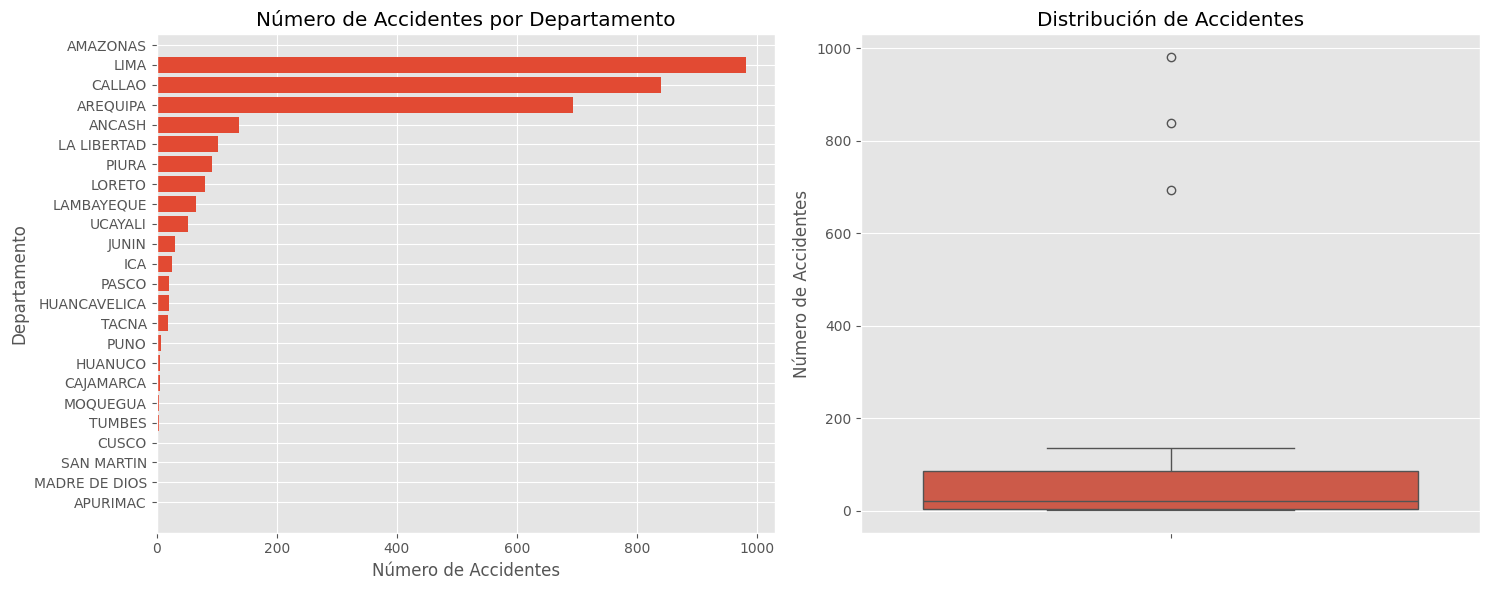

In [51]:
import os
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def check_shapefile_files(shapefile_base):
    required_extensions = ['.shp', '.shx', '.dbf']
    missing_files = [ext for ext in required_extensions if not os.path.exists(shapefile_base + ext)]
    if missing_files:
        raise FileNotFoundError(f"Faltan los siguientes archivos necesarios: {', '.join(missing_files)}")

def create_accident_map(shapefile_path, accidents_data):
    # Leer el shapefile
    peru_map = gpd.read_file(shapefile_path)
    
    # Renombrar la columna del shapefile para que coincida con los datos de accidentes
    peru_map = peru_map.rename(columns={'DEPARTAMEN': 'DEPARTAMENTO'})
    
    # Calcular el número de accidentes por departamento
    accidents_per_department = accidents_data.groupby('DEPARTAMENTO').size().reset_index(name='NUM_ACCIDENTES')
    
    # Unir el mapa con los datos de accidentes
    peru_accidents = peru_map.merge(accidents_per_department, on='DEPARTAMENTO', how='left')
    
    # Crear un mapa centrado en Perú
    mapa_peru = folium.Map(location=[-9.19, -75.0152], zoom_start=6)
    
    # Crear el mapa coroplético
    folium.Choropleth(
        geo_data=peru_accidents,
        data=peru_accidents,
        columns=['DEPARTAMENTO', 'NUM_ACCIDENTES'],
        key_on='feature.properties.DEPARTAMENTO',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Número de Accidentes por Departamento'
    ).add_to(mapa_peru)
    
    return mapa_peru, peru_accidents

def create_additional_visualizations(peru_accidents):
    plt.style.use('ggplot')  # Usar un estilo válido de matplotlib
    
    # Verificar si la columna 'DEPARTAMENTO' existe
    if 'DEPARTAMENTO' not in peru_accidents.columns:
        raise KeyError("La columna 'DEPARTAMENTO' no existe en el DataFrame")

    # Crear figura con subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Gráfico de barras horizontal de accidentes por departamento
    sorted_data = peru_accidents.sort_values('NUM_ACCIDENTES', ascending=True)
    ax1.barh(sorted_data['DEPARTAMENTO'], sorted_data['NUM_ACCIDENTES'])
    ax1.set_title('Número de Accidentes por Departamento')
    ax1.set_xlabel('Número de Accidentes')
    ax1.set_ylabel('Departamento')
    
    # 2. Boxplot de la distribución de accidentes
    sns.boxplot(y=peru_accidents['NUM_ACCIDENTES'], ax=ax2)
    ax2.set_title('Distribución de Accidentes')
    ax2.set_ylabel('Número de Accidentes')
    
    plt.tight_layout()
    return fig

if __name__ == "__main__":
    try:
        # Rutas de archivos
        shapefile_base = r'C:\Users\USER\Desktop\MTPE\Analitica_MTPE\Dataset\departamentos'
        
        # Verificar archivos necesarios del shapefile
        check_shapefile_files(shapefile_base)

        # Datos de accidentes procesados
        
        # Crear el mapa
        mapa_peru, peru_accidents = create_accident_map(shapefile_base + '.shp', processed_data)
        
        # Guardar el mapa como HTML
        mapa_peru.save('mapa_accidentes_peru.html')
        
        # Crear visualizaciones adicionales
        fig = create_additional_visualizations(peru_accidents)
        
        # Guardar las visualizaciones
        fig.savefig('visualizaciones_accidentes.png', dpi=300, bbox_inches='tight')
        
        print("Mapa y visualizaciones creadas exitosamente")
        
    except Exception as e:
        print(f"Error en la ejecución: {str(e)}")